<h1> Model Evaluation and Refinement </h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("clean_autos.csv")

<p> We will take only numeric data </p>

In [2]:
df = df._get_numeric_data()
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,std,turbo
0,3,122,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,...,5000.0,21,27,13495.0,11.190476,8.703704,0,1,1,0
1,3,122,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,...,5000.0,21,27,16500.0,11.190476,8.703704,0,1,1,0
2,1,122,94.5,0.822681,0.909722,0.876254,2823,152,2.68,3.47,...,5000.0,19,26,16500.0,12.368421,9.038462,0,1,1,0
3,2,164,99.8,0.848630,0.919444,0.908027,2337,109,3.19,3.40,...,5500.0,24,30,13950.0,9.791667,7.833333,0,1,1,0
4,2,164,99.4,0.848630,0.922222,0.908027,2824,136,3.19,3.40,...,5500.0,18,22,17450.0,13.055556,10.681818,0,1,1,0


<h2>  Training and Testing </h2>
Important step in testing model is to split data into training and testing set.

In [3]:
# save target data as y
y_data = df["price"]
# drop columns with price
x_data = df.drop("price",axis=1)

<p> Now <b> Randomly split </b> data into trainig and test set usig train_test_split.  </p>

In [4]:
from sklearn.model_selection import train_test_split
# random_state is a seed
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size=0.10,random_state=1)
print("Shape of trainig data: ", x_train.shape)
print("Shape of test data: ",x_test.shape)

Shape of trainig data:  (180, 21)
Shape of test data:  (21, 21)


<p>We will now train the linear model on training data set</p>

In [5]:
from sklearn.linear_model import LinearRegression
# create an linear regression object
lm = LinearRegression()
# fit the model using hose-power feature
lm.fit(x_train[["horsepower"]],y_train)

LinearRegression()

<p> Let's calculate R-squared of our model on training set and on test set. </p>

In [6]:
RS_test = lm.score(x_test[["horsepower"]],y_test)
RS_train = lm.score(x_train[["horsepower"]],y_train)
print(f" This is R^2 for test set: {RS_test}\n This is R^2 for training set: {RS_train}")

 This is R^2 for test set: 0.3635480624962414
 This is R^2 for training set: 0.662028747521533


<p> We notice that for test set R-squared is lower, this indicates that this model is not preforming well... </p>

<h2> Cross-Validation Score </h2>

In [7]:
from sklearn.model_selection import cross_val_score
# we can also predict output
from sklearn.model_selection import cross_val_predict
# R^2 is caluclate by default
# we can change it giving parameter scoring="..."
# cv specifies number of folds for cross-validations
"""
Example
If cv = 4 than data is split in four groups and each is train and tested with one eachoder.+
"""
Rcross = cross_val_score(lm, x_data[["horsepower"]], y_data, cv=4)


In [8]:
# each value has the avarage R^2 value for the fold
Rcross

array([0.77465419, 0.51718424, 0.74814454, 0.04825398])

In [9]:
print(f" The mean of the folds is {Rcross.mean()}\n The standard deviation is {Rcross.std()}")

 The mean of the folds is 0.5220592359225413
 The standard deviation is 0.29130480666118463


In [10]:
# to make predictions Y^
yhat = cross_val_predict(lm,x_data[["horsepower"]],y_data,cv=4)
yhat[:10]

array([14142.23793549, 14142.23793549, 20815.3029844 , 12745.549902  ,
       14762.9881726 , 13987.05037621, 13987.05037621, 13987.05037621,
       18642.67715452, 12590.36234272])

<h2> Overfitting, Underfittig and Model Selection </h2>
<p> The best way to check if our model works is by testing it with data that model was not trained on. The reson for this is that we want to assure that model is not trying to fit the "noise" of data insated acctualy predicts apperance of features. </p>
<h4>Overfitting</h4>
<p>Overfitting occurs when the model fits the noise, but not the underlying process. Therefore, when testing your model using the test set, your model does not perform as well since it is modelling noise, not the underlying process that generated the relationship. Let's create a degree 5 polynomial model.</p>

<p> Let's confront this in example. </p>

In [11]:
lr = LinearRegression()
lr.fit(x_train[["horsepower","curb-weight","engine-size","highway-mpg"]], y_train)

LinearRegression()

In [12]:
# calculate predictions on train set
yhat_train = lr.predict(x_train[["horsepower","curb-weight","engine-size","highway-mpg"]])
# calculate predictions on test set
yhat_test = lr.predict(x_test[["horsepower","curb-weight","engine-size","highway-mpg"]])

<p> Let's visualize the result. </p>

In [13]:
import seaborn as sns

In [14]:
#y_data
def PlotDistributions(y_train,y_test,width=12,height=10):
    fig, ax = plt.subplots(figsize=(width,height))
    #sns.kdeplot(y_data, color='k', label="original price", ax=ax)
    sns.kdeplot(y_train, color='b', label="real price", ax=ax)
    sns.kdeplot(y_test, color='r', label="predicted price", ax=ax)
    ax.set_title('Actual vs Fitted Values for Price')
    ax.set_xlabel('Price (in dollars)')
    ax.set_ylabel('Density')
    plt.legend()
    plt.show()
    plt.close()

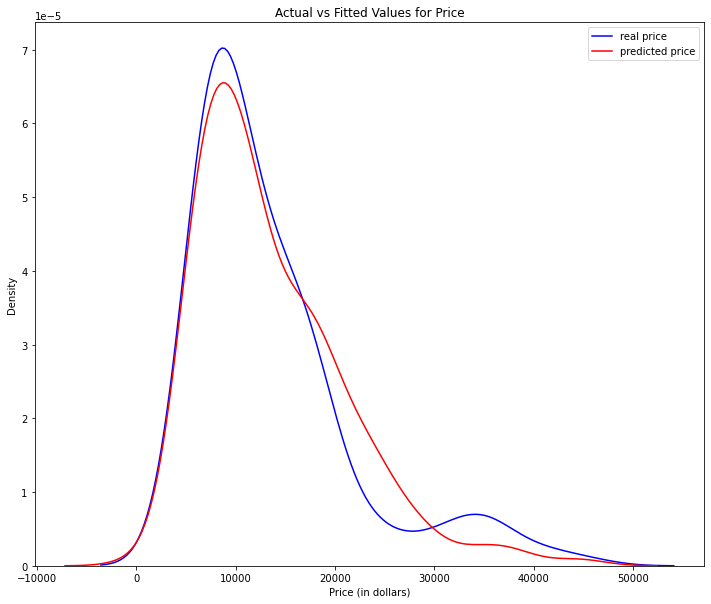

In [15]:
PlotDistributions(y_train,yhat_train)

<p> So far model (red line) quite well expalins the proce compared to true price (blue line) </>

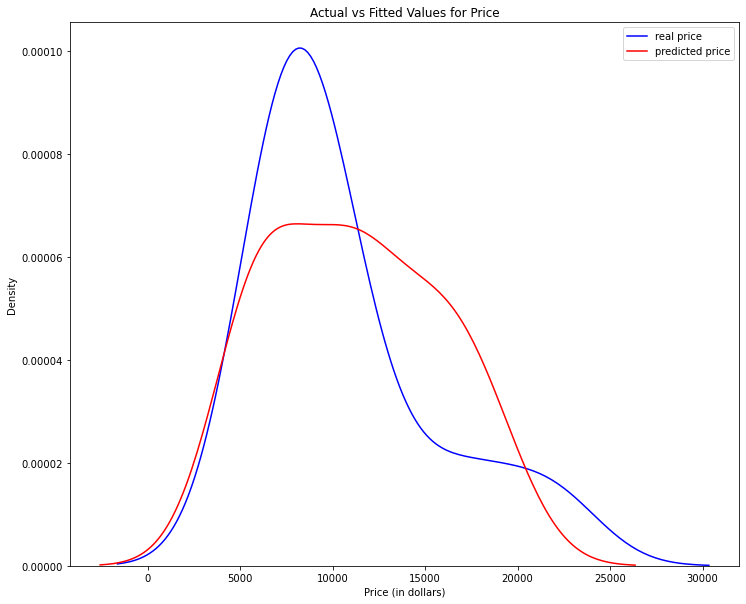

In [16]:
PlotDistributions(y_test,yhat_test)

<p> But when we compare preformance for test set we see that true (blue line) and predicted price (red line) this time vary much from each other.  </p>
<p> Let's try how well will perform <b>polynomial regression</b>. </p>

In [17]:
from sklearn.preprocessing import PolynomialFeatures

<p> Let's change the proportion of training and test data. </p>

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size=0.45,random_state=0)

<p> We will make a 5th-order polynomial regression. </p>

In [19]:
# we will do a 5th degree polunomial transformation
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[["horsepower","curb-weight","engine-size","highway-mpg"]])
x_test_pr = pr.fit_transform(x_test[["horsepower","curb-weight","engine-size","highway-mpg"]])
print(x_train_pr.shape)
pr

(110, 126)


PolynomialFeatures(degree=5)

In [20]:
# create the regression obj
pm = LinearRegression()
# fit model to our data
pm.fit(x_train_pr, y_train)

LinearRegression()

In [21]:
# lets create predictions on test data
yhat_train_pr = pm.predict(x_train_pr)
yhat_test_pr = pm.predict(x_test_pr)

<p> Let's visualize resoults. </p>

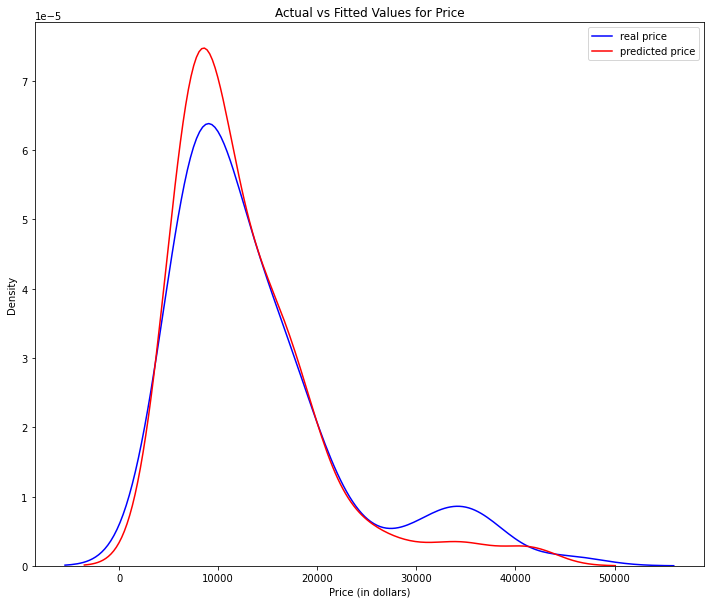

In [22]:
PlotDistributions(y_test,yhat_train_pr)

<p> Again training set performs really good compared to target price. </p>

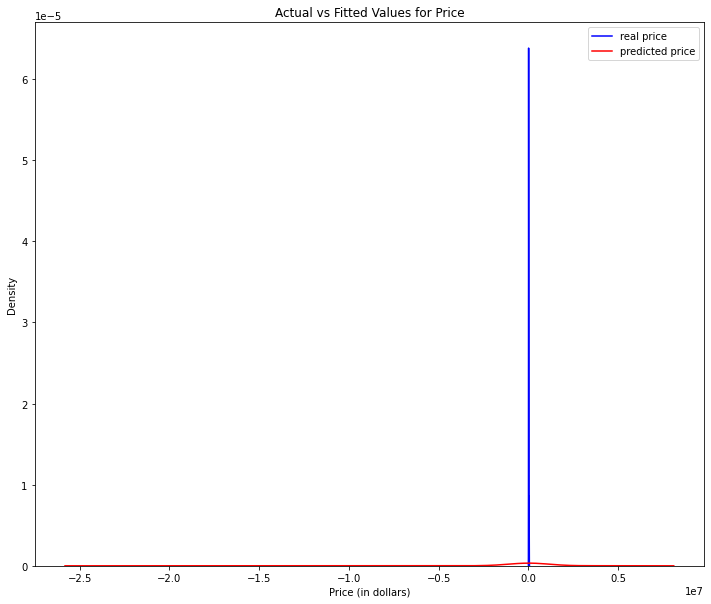

In [23]:
PlotDistributions(y_test,yhat_test_pr)

<p> I think the image says everythink :) </p>

<p> We will try to understand how polynomial regression fits model based on one feature highway-mpg. </p>

In [24]:
pr = PolynomialFeatures(degree=5)
#s = "highway-mpg"
s = "horsepower"
x_train_pr = pr.fit_transform(x_train[[s]])
x_test_pr = pr.fit_transform(x_test[[s]])
poly = LinearRegression()
poly.fit(x_train_pr, y_train)
yhat = poly.predict(x_test_pr)

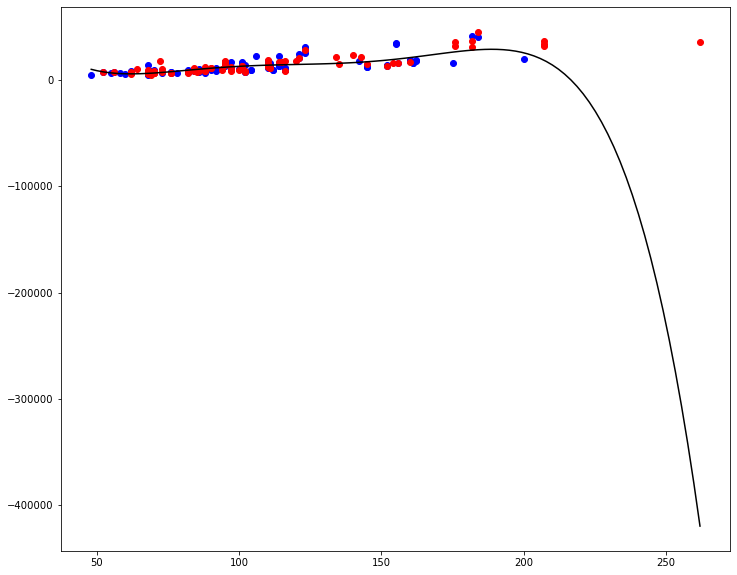

In [25]:
width,height=12,10
fig,ax = plt.subplots(figsize=(width,height))
ax.scatter(x_train[[s]],y_train,color='b')
ax.scatter(x_test[[s]],y_test,color='r')

xmin = min([x_train[[s]].values.min(),x_test[[s]].values.min()])
xmax = max([x_train[[s]].values.max(),x_test[[s]].values.max()])

x = np.linspace(xmin,xmax,100)
y = poly.predict(pr.fit_transform(x.reshape(-1,1)))
ax.plot(x,y,color='k')

We could say that model performs weel but we can see that it diverges after 200 horsepower very drastically...
<p> Let's calculate R^2 for this model </p>

In [26]:
RSp_train = poly.score(x_train_pr,y_train)
RSp_test = poly.score(x_test_pr,y_test)
print(f" Traning set R^2 = {RSp_train}\n Test set R^2 = {RSp_test}")

 Traning set R^2 = 0.5568527854059586
 Test set R^2 = -29.815409315794835


<p>The lower R^2, the model fits worse. The negative values is a sign of overfitting.</p>
<p> Let's see how R^2 is changing with changing order of polynomial regression. </p>

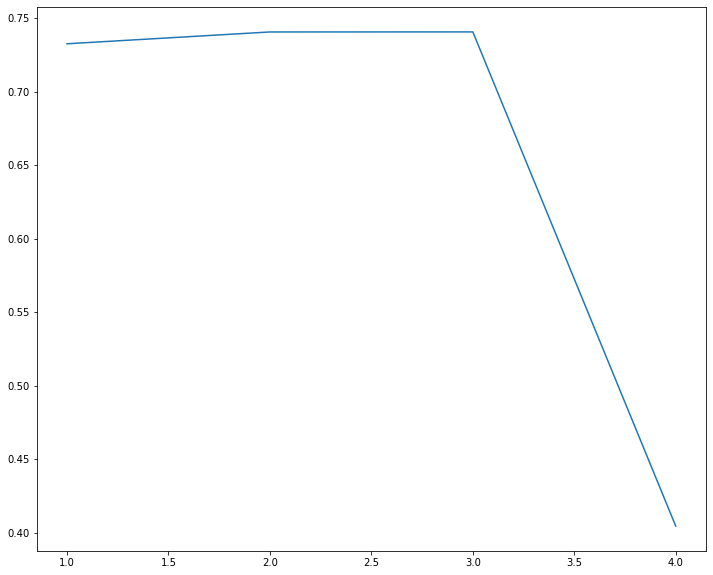

In [27]:
s = "horsepower"
lr = LinearRegression()
RSp_values = []
d = 5
order = range(1,d)
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[[s]])
    x_test_pr = pr.fit_transform(x_test[[s]])
    
    lr.fit(x_train_pr,y_train)
    
    RSp_values.append(lr.score(x_test_pr,y_test))
    
fig, ax = plt.subplots(figsize=(width,height))
ax.plot(order,RSp_values)